# Census Income >50K Prediction

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [27]:
import os
os.chdir("C:/Users/Sristi/Documents/R/data")
os.getcwd()

'C:\\Users\\Sristi\\Documents\\R\\data'

In [52]:
df_train=pd.read_csv("Income_Census.csv", sep=",")
df_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income census
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27917,45,Private,60267,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,38,United-States,<=50K
27918,59,Private,264357,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,<=50K
27919,41,Private,191814,HS-grad,9,Married-civ-spouse,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
27920,23,Private,107882,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income census'],
      dtype='object')


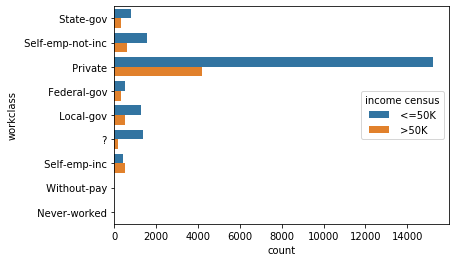

In [30]:
#Data Visualizations
cat_data = df_train.select_dtypes(include=['object'])
print(cat_data.columns)
sns.countplot(y='workclass',hue='income census', data=cat_data)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income census'],
      dtype='object')


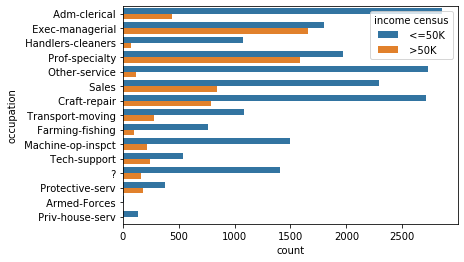

In [31]:
cat_data = df_train.select_dtypes(include=['object'])
print(cat_data.columns)
sns.countplot(y='occupation',hue='income census', data=cat_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000AEC1C00148>,
      dtype=object)

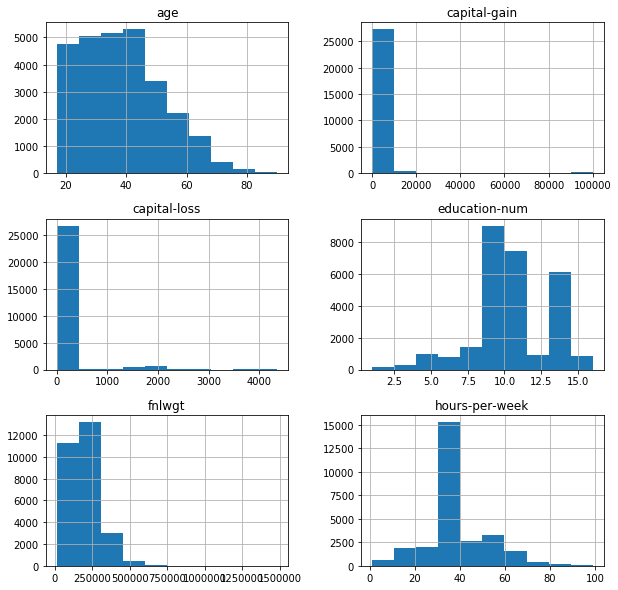

In [32]:
df_train.hist(figsize=(10,10))

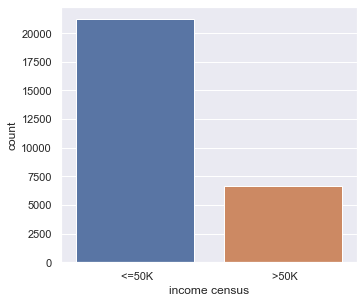

In [34]:
#count plot of different incomes
sns.set(rc={'figure.figsize':(5.3,4.7)})
sns.countplot(df_train['income census'])

In [35]:
pd.crosstab(df_train['marital-status'],df_train['income census'])
#max 'Never-married' earn <=50K
#max 'Married-civ-spouse' earn >50K

income census,<=50K,>50K
marital-status,,
Divorced,3440,388
Married-AF-spouse,13,8
Married-civ-spouse,7089,5706
Married-spouse-absent,336,30
Never-married,8719,430
Separated,839,59
Widowed,799,66


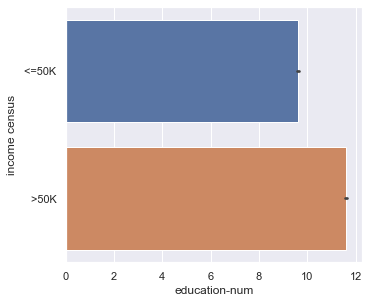

In [36]:
sns.barplot(x='education-num',y='income census',data=df_train)
plt.show()

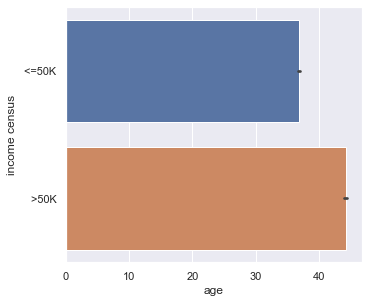

In [37]:
sns.barplot(x='age',y='income census',data=df_train)
plt.show()

In [53]:
df_test=pd.read_csv("Income_test.csv", sep=",")
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income census
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [54]:
df=df_train.append(df_test, 'sort=True')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income census
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44198,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
44199,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
44200,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
44201,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [55]:
#Drop columns
df.drop(['fnlwgt'],axis=1,inplace=True)
df.drop(['education'],axis=1,inplace=True)
df.drop(['relationship'],axis=1,inplace=True)
df.drop(['native-country'],axis=1,inplace=True)
df.drop(['race'],axis=1,inplace=True)

In [56]:
#Removing null values from dataset
df.replace(np.NaN, 0, inplace=True)

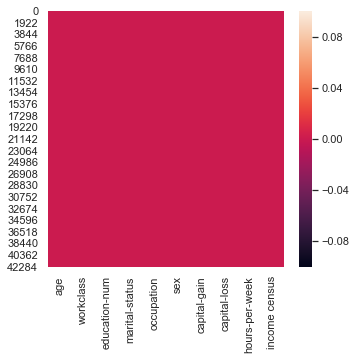

In [57]:
#nonull values present
sns.heatmap(df.isnull())

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['workclass','marital-status','occupation']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [59]:
#Converting all categorical values into numerical
df=pd.get_dummies(df)

In [60]:
df.drop(['income census_ <=50K'],axis=1,inplace=True)
df.drop(['income census_ >50K'],axis=1,inplace=True)

In [61]:
df

,age,workclass,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,sex_ Female,sex_ Male,income census_ <=50K.,income census_ >50K.
0,39,7,13,4,1,2174,0,40,0,1,0,0
1,50,6,13,2,4,0,0,13,0,1,0,0
2,38,4,9,0,6,0,0,40,0,1,0,0
3,53,4,7,2,6,0,0,40,0,1,0,0
4,28,4,13,2,10,0,0,40,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
44198,39,4,13,0,10,0,0,36,1,0,1,0
44199,64,0,9,6,0,0,0,40,0,1,1,0
44200,38,4,13,2,10,0,0,50,0,1,1,0
44201,44,4,13,0,1,5455,0,40,0,1,1,0


In [62]:
#Correlation
df_cor=df.corr()
df_cor

,age,workclass,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,sex_ Female,sex_ Male,income census_ <=50K.,income census_ >50K.
age,1.000000,0.020237,0.030606,-0.261718,-0.012041,0.076759,0.056375,0.071599,-0.085766,0.085766,-0.073696,0.127227
workclass,0.020237,1.000000,0.055556,-0.071210,0.260375,0.035657,0.011072,0.141429,-0.091836,0.091836,-0.018685,0.031036
education-num,0.030606,0.055556,1.000000,-0.069024,0.112812,0.125583,0.080366,0.142490,-0.009603,0.009603,-0.115517,0.180903
marital-status,-0.261718,-0.071210,-0.069024,1.000000,-0.020199,-0.044819,-0.033051,-0.186954,0.127987,-0.127987,0.073971,-0.107796
occupation,-0.012041,0.260375,0.112812,-0.020199,1.000000,0.024544,0.017774,0.081053,-0.076199,0.076199,-0.025862,0.044859
capital-gain,0.076759,0.035657,0.125583,-0.044819,0.024544,1.000000,-0.031344,0.081552,-0.045110,0.045110,-0.078560,0.123786
capital-loss,0.056375,0.011072,0.080366,-0.033051,0.017774,-0.031344,1.000000,0.055425,-0.046787,0.046787,-0.048305,0.079251
hours-per-week,0.071599,0.141429,0.142490,-0.186954,0.081053,0.081552,0.055425,1.000000,-0.228087,0.228087,-0.079005,0.125062
sex_ Female,-0.085766,-0.091836,-0.009603,0.127987,-0.076199,-0.045110,-0.046787,-0.228087,1.000000,-1.000000,0.075576,-0.116862
sex_ Male,0.085766,0.091836,0.009603,-0.127987,0.076199,0.045110,0.046787,0.228087,-1.000000,1.000000,-0.075576,0.116862


In [63]:
df.describe()

,age,workclass,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,sex_ Female,sex_ Male,income census_ <=50K.,income census_ >50K.
count,44203.000000,44203.000000,44203.000000,44203.000000,44203.000000,44203.000000,44203.000000,44203.000000,44203.000000,44203.000000,44203.000000,44203.000000
mean,38.665950,3.872158,10.079565,2.620772,6.575956,1090.822501,87.225641,40.401489,0.331629,0.668371,0.281316,0.087008
std,13.735779,1.465595,2.568615,1.510472,4.233346,7544.056951,402.393904,12.367868,0.470804,0.470804,0.449646,0.281849
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,0.000000,0.000000,40.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,0.000000,0.000000,45.000000,1.000000,1.000000,1.000000,0.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44203 entries, 0 to 44202
Data columns (total 12 columns):
age                      44203 non-null int64
workclass                44203 non-null int32
education-num            44203 non-null int64
marital-status           44203 non-null int32
occupation               44203 non-null int32
capital-gain             44203 non-null int64
capital-loss             44203 non-null int64
hours-per-week           44203 non-null int64
sex_ Female              44203 non-null uint8
sex_ Male                44203 non-null uint8
income census_ <=50K.    44203 non-null uint8
income census_ >50K.     44203 non-null uint8
dtypes: int32(3), int64(5), uint8(4)
memory usage: 2.4 MB


In [65]:
df.skew()

age                       0.560597
workclass                -0.744717
education-num            -0.311464
marital-status           -0.016302
occupation                0.108956
capital-gain             11.777447
capital-loss              4.575822
hours-per-week            0.243722
sex_ Female               0.715281
sex_ Male                -0.715281
income census_ <=50K.     0.972739
income census_ >50K.      2.930720
dtype: float64

In [66]:
df.drop(['capital-gain'],axis=1,inplace=True)
df.drop(['capital-loss'],axis=1,inplace=True)

In [68]:
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [69]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(44203, 10)
(39534, 10)


In [80]:
import numpy as np
df_x=df_final.drop(columns=["income census_ >50K."])
y=df_final[["income census_ >50K."]]

In [94]:
from sklearn.preprocessing import LabelEncoder
label_income = LabelEncoder()

In [95]:
df['income census_ >50K.'] = label_income.fit_transform(df['income census_ >50K.'])

In [96]:
df['income census_ >50K.'].value_counts()

0    40357
1     3846
Name: income census_ >50K., dtype: int64

In [97]:
X = df.drop('income census_ >50K.', axis=1)
Y = df['income census_ >50K.']

In [98]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)

In [99]:
x.skew()

age                     -0.112037
workclass               -0.744717
education-num           -0.311464
marital-status          -0.016302
occupation               0.108956
hours-per-week           0.243722
sex_ Female              0.715281
sex_ Male               -0.715281
income census_ <=50K.    0.972739
dtype: float64

In [100]:
df.drop(['income census_ <=50K.'],axis=1,inplace=True)


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x, Y, random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

max r2 score corresponding to  68  is  0.09797207745624859


In [103]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.3,random_state=68,stratify=Y)

In [104]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(30942, 9) (13261, 9)
(30942,) (13261,)


In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [106]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=78)
GNB=GaussianNB()

In [107]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))

In [108]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

******************** KNeighborsClassifier ********************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.9077746776261217


Cross_val_score =  0.9047127200962606


roc_auc_score =  0.518317174460712


classification_report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     12107
           1       0.31      0.05      0.08      1154

    accuracy                           0.91     13261
   macro avg       0.61      0.52      0.52     13261
weighted avg       0.86      0.91      0.88     13261



[[11984   123]
 [ 1100    54]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



******************** SVC ********************


SVC()


Accuracy_score =  0.9129779051353594


Cross_val_score =  0.9129923315937007


roc_auc_score =  0.5


classification_report
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12107
           1       0.00      0.00      0.00      1154

    a

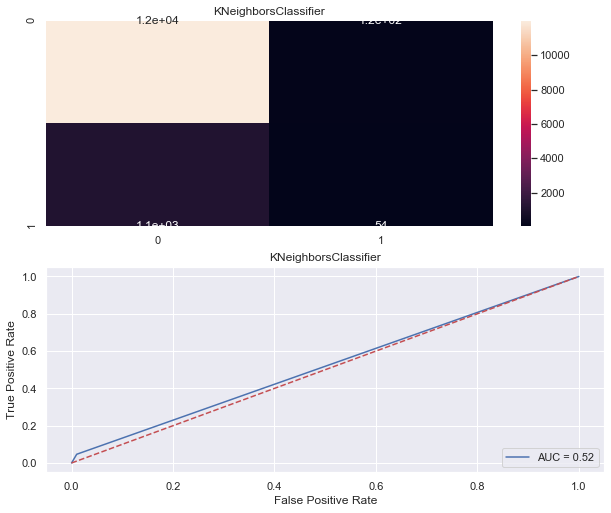

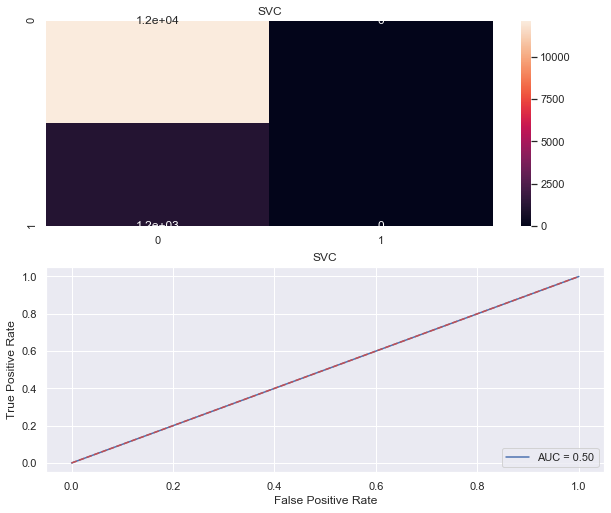

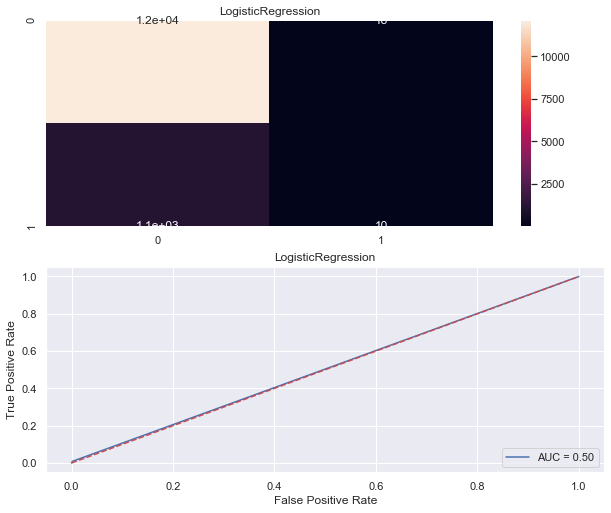

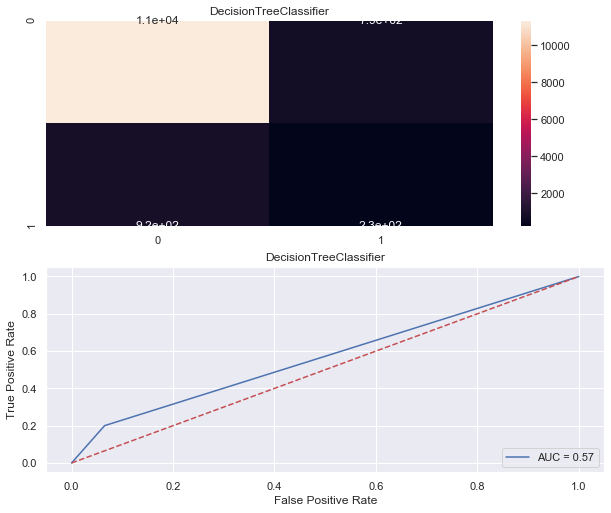

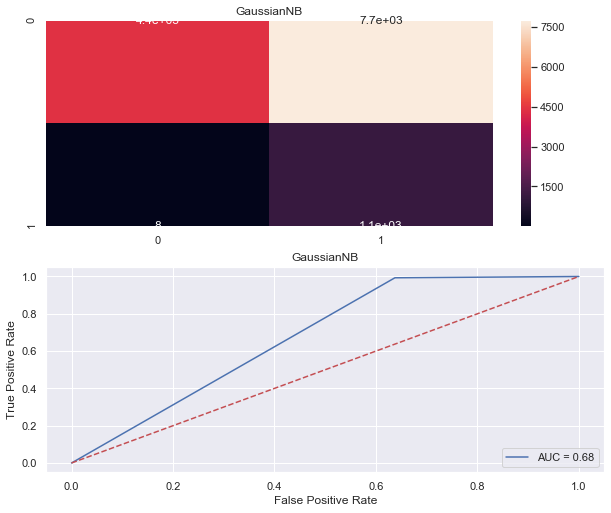

In [109]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('********************',name,'********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, Y, cv=5, scoring='accuracy').mean()
    print('Cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [110]:
Result = pd.DataFrame({'Model': Model, 'Accuracy_score': score, 'Cross_val_score':cvs, 'ROC_auc_curve':rocscore})

In [111]:
Result

,Model,Accuracy_score,Cross_val_score,ROC_auc_curve
0,KNeighborsClassifier,90.777468,90.471272,51.831717
1,SVC,91.297791,91.299233,50.000000
2,LogisticRegression,91.237463,91.140879,50.358938
3,DecisionTreeClassifier,87.097504,86.575760,56.754350
4,GaussianNB,41.746475,41.931039,67.783387


# Accuracy score of SVC is highest. So SVC is the final model saved

In [113]:
#Saving the logistic regression model
from joblib import dump, load
dump(SV, 'Income_Census.joblib')

['Income_Census.joblib']